In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from mip.model import *

Using Python-MIP package version 1.6.3


In [3]:
# importing the data to take a look at what we have

df = pd.read_csv('../data/family_data.csv',index_col=0)

df.head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
family_id,,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28,4
1,26,4,82,5,11,47,38,6,66,61,4
2,100,54,25,12,27,82,10,89,80,33,3
3,2,95,1,96,32,6,40,31,9,59,2
4,53,1,47,93,26,3,46,16,42,39,4


In [4]:
# load the penalties for days with high traffic
day_penalty = pd.read_csv('day_penalty.txt',sep='\t',index_col=0)['penalty']
day_penalty.head()

day
1     2.4
5     2.4
17    2.4
18    2.4
46    2.4
Name: penalty, dtype: float64

In [5]:
day_penalty[5]

2.4

In [6]:
# for testing
num_days=100
num_families = 5000

In [7]:
df2 = df[:num_families].copy()

In [8]:
#people scaling 
people_scale = df2.n_people.sum()/df.n_people.sum()

max_people = np.around(1.5*df2.n_people.sum()/num_days)
min_people = np.around(df2.n_people.sum()/2/num_days)

if num_days==100 and num_families==5000:
    max_people = 300
    min_people = 125

# day scaling
day_scale = num_days/100

In [9]:
print(max_people)
print(min_people)
print(day_scale)
print(people_scale)

300
125
1.0
1.0


In [10]:
if num_days!=100:
    for c in df2.columns.tolist()[:10]:
        df2[c] = np.random.randint(1,num_days+1,num_families)

In [11]:
df2.head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
family_id,,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28,4
1,26,4,82,5,11,47,38,6,66,61,4
2,100,54,25,12,27,82,10,89,80,33,3
3,2,95,1,96,32,6,40,31,9,59,2
4,53,1,47,93,26,3,46,16,42,39,4


In [12]:
# I'm going to add a column which will represent the choice falling outside of any of the given choices. 
# This will be choice_10, and it will be 101,,,

In [13]:
df2.describe()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,40.715000,41.601000,41.194200,41.595000,41.950600,42.63520,41.965000,42.739600,42.33900,42.608200,4.20060
std,29.054208,29.518375,28.821878,29.094602,29.045049,28.98729,28.711089,28.959156,28.69832,28.116088,1.53272
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,2.00000
25%,16.000000,16.000000,17.000000,17.000000,17.000000,18.00000,17.000000,18.000000,17.00000,19.000000,3.00000
50%,38.000000,38.000000,38.000000,39.000000,39.000000,40.00000,39.000000,39.000000,39.00000,39.000000,4.00000
75%,62.000000,66.000000,63.000000,66.000000,66.000000,66.00000,66.000000,67.000000,66.00000,66.000000,5.00000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,8.00000


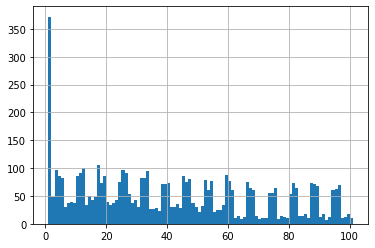

In [14]:
df2['choice_0'].hist(bins=[b for b in range(1,num_days+2,1)])

In [15]:
lower_limit = min_people
upper_limit = max_people

# creating the decision variables
choice = ['choice_0','choice_1', 'choice_2', 'choice_3', 'choice_4', 'choice_5', 
          'choice_6', 'choice_7', 'choice_8', 'choice_9','choice_10']
day = [i for i in range(1,num_days+1)]
fam_id = df2.index.tolist()
n_people = df['n_people'].to_dict()

In [16]:
choice_matrix = {}

for f in fam_id:
    
    if f%100==0:
        print('{}/{}'.format(f,len(df2)))
    
    choice_matrix[f] = {}
    
    for d in day:
        
        choice_to_check = df2.loc[f,df2.columns.tolist()[:10]].values
        
        if d in choice_to_check:
            c_loc = np.where(choice_to_check==d)[0][0]
        else:
            c_loc = 10
            
            
        choice_matrix[f][d] = {c:(0 if i!=c_loc else 1) for i,c in enumerate(choice)} 

0/5000
100/5000
200/5000
300/5000
400/5000
500/5000
600/5000
700/5000
800/5000
900/5000
1000/5000
1100/5000
1200/5000
1300/5000
1400/5000
1500/5000
1600/5000
1700/5000
1800/5000
1900/5000
2000/5000
2100/5000
2200/5000
2300/5000
2400/5000
2500/5000
2600/5000
2700/5000
2800/5000
2900/5000
3000/5000
3100/5000
3200/5000
3300/5000
3400/5000
3500/5000
3600/5000
3700/5000
3800/5000
3900/5000
4000/5000
4100/5000
4200/5000
4300/5000
4400/5000
4500/5000
4600/5000
4700/5000
4800/5000
4900/5000


In [17]:
# gift card contribution by choice
choice_gc = {}
choice_gc['choice_0'] = 0
choice_gc['choice_1'] = 50
choice_gc['choice_2'] = 50
choice_gc['choice_3'] = 100
choice_gc['choice_4'] = 200
choice_gc['choice_5'] = 200
choice_gc['choice_6'] = 300
choice_gc['choice_7'] = 300
choice_gc['choice_8'] = 400
choice_gc['choice_9'] = 500
choice_gc['choice_10'] = 500

# per member monetary contribution
choice_pm = {}
choice_pm['choice_0'] = 0
choice_pm['choice_1'] = 0
choice_pm['choice_2'] = 9
choice_pm['choice_3'] = 9
choice_pm['choice_4'] = 9
choice_pm['choice_5'] = 18
choice_pm['choice_6'] = 18
choice_pm['choice_7'] = 36
choice_pm['choice_8'] = 36
choice_pm['choice_9'] = 36+199
choice_pm['choice_10'] = 36+398


Create a lookup table for the accounting penalty

In [18]:
def accounting_penalty_actual(Nd,diff):
    return 300/max_people*(Nd-min_people)/400 * Nd**(0.5+diff/50)

In [19]:
acc_table = {}
for Nd in range(int(min_people),int(max_people)+1,1):
    acc_table[Nd] = [accounting_penalty_actual(Nd,diff) for diff in range(0,int(max_people-min_people)+1,1)]

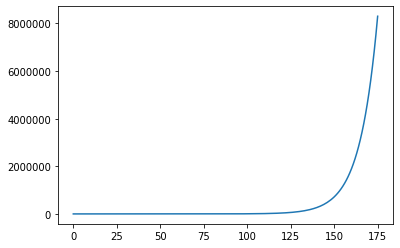

In [20]:
plt.plot(np.arange(0,int(max_people-min_people+1),1),acc_table[int(min_people+10)][:int(max_people-min_people+1)])

The decision variable needs to be a boolean for each choice for each family. We will create a 

In [112]:
# set the parameters

max_diff = 35 # this is the maximum difference between two days in total number of people
w1 = 0 # this is the weight applied to the simple difference ppd(d)-ppd(d+1)
w2 = 0.2 # this is the weight applied to the simple linear shopping penalty
w3 = 0 # this is the multiplier for the day penalty for high traffic days
w4 = 3 # new weight on the difference

In [113]:
# The prob variable is created to contain the problem data        
m = Model()

In [114]:
# The decision variables are actually the family and the day they are assigned
x = [ [m.add_var(name='fam_{},day_{}'.format(f,d),var_type=BINARY) for d in day] for f in fam_id ]

In [115]:
#y = [m.add_var(name='diff_{}'.format(d),var_type=INTEGER, lb=0, ub=upper_limit-lower_limit) for d in day]
e1 = [m.add_var(name='e1_{}'.format(d),var_type=INTEGER) for d in day]
e2 = [m.add_var(name='e2_{}'.format(d),var_type=INTEGER) for d in day]

In [116]:
def ppd_fast(di):
    if di==num_days:
        di = num_days-1
    return xsum(x[fi][di]*n_people[f] for fi,f in enumerate(fam_id))

def ppd(d):
    if d>num_days:
        d=num_days
    di = day.index(d)
    return xsum(x[fi][di]*n_people[f] for fi,f in enumerate(fam_id))

In [117]:


#m.objective = minimize(xsum(x[fi][di]*choice_matrix[f][d][c]*(choice_gc[c] + n_people[f]*choice_pm[c])
#                            + ppd_fast(di)*(w1+w2) - w1*ppd_fast(di+1) - w2*125
#         for c in choice for di,d in enumerate(day) for fi,f in enumerate(fam_id))) 

#m.objective = minimize(xsum(x[fi][di]*choice_matrix[f][d][c]*(choice_gc[c] + n_people[f]*choice_pm[c]+w3*day_penalty[d])
#                       for c in choice for di,d in enumerate(day) for fi,f in enumerate(fam_id))#)
#                       +xsum(w4*y[di] for di,d in enumerate(day)))

m.objective = minimize(xsum(x[fi][di]*choice_matrix[f][d][c]*(choice_gc[c] + n_people[f]*choice_pm[c]+w3*day_penalty[d])
                       for c in choice for di,d in enumerate(day) for fi,f in enumerate(fam_id))#)
                      +xsum(w4*(e1[di]+e2[di]) + w2*(ppd_fast(di)-125) for di,d in enumerate(day)))

#m.objective = minimize(xsum((e1[di]+e2[di]) for di,d in enumerate(day)))
                       
                      #+ xsum(ppd_fast(di)*(w1+w2) - w1*ppd_fast(di+1) - w2*125 for di,d in enumerate(day))) 

In [118]:

     
#m += ( xsum(x[fi][di]*choice_matrix[f][d][c]*(choice_gc[c] + n_people[f]*choice_pm[c]+w3*day_penalty[d])
#                       for c in choice for di,d in enumerate(day) for fi,f in enumerate(fam_id)) <= 60000 ) 

In [119]:
# adding in the constraints

# The first set of constraints ensures each family only has a single day selected
for fi,f in enumerate(fam_id):
        m += xsum(x[fi][di] for di,d in enumerate(day)) == 1

In [120]:
# the second set of constraints guarantee that the total number of visitors is between 125 and 300 for
# for every single day leading up to christmas

for di,d in enumerate(day):
    m += ppd(d) >= lower_limit, ''
    m += ppd(d) <= upper_limit, ''

In [121]:
# adding this third constraint to prevent the difference between each day from climbing too high.

#for di,d in enumerate(day[0:len(day)-1]):
#    m += ppd(d)-ppd(d+1) >= -max_diff, ''
#    m += ppd(d)-ppd(d+1) <= max_diff, ''


In [122]:
# This constraint makes the difference equal to the difference in the days, and the limits on the parameter
# force it to be positive

for di,d in enumerate(day[0:len(day)-1]):
    m += e1[di]-e2[di] == ppd(d)-ppd(d+1) , ''
    
    m += e1[di]-e2[di] >= -max_diff, ''
    m += e1[di]-e2[di] <= max_diff, ''
    
    m += e1[d] >= 0
    m += e2[d] >= 0
    
# need to set the last day difference =0
m += e1[num_days-1]-e2[num_days-1] == 0
m += e1[num_days-1] == 0
m += e2[num_days-1] == 0

    
    


In [123]:
#m.max_gap = 0.05
status = m.optimize(max_seconds=60*60*8)

if status == OptimizationStatus.OPTIMAL:
    print('optimal solution cost {} found'.format(m.objective_value))
elif status == OptimizationStatus.FEASIBLE:
    print('sol.cost {} found, best possible: {}'.format(m.objective_value, m.objective_bound))
elif status == OptimizationStatus.NO_SOLUTION_FOUND:
    print('no feasible solution found, lower bound is: {}'.format(m.objective_bound))
else:
    print('No solution')


sol.cost 99235.60000000126 found, best possible: 76803.96262847964


In [124]:
status

<OptimizationStatus.FEASIBLE: 3>

In [125]:
#m.write('model.lp')

In [126]:
obj = m.objective_value
print(obj)

99235.60000000126


In [128]:
fam_day_dict = {}

for i,v in enumerate(m.vars[:500000]):
    
    if i%10000==0:
        print('{}/{}'.format(i,len(m.vars)))
    if abs(v.x) > 1e-6: # only printing non-zeros
        #print('{} : {}'.format(v.name, v.x))
        s = v.name.split(',')
        fam_day_dict[int(s[0][4:])] = int(s[1][4:])


0/500200
10000/500200
20000/500200
30000/500200
40000/500200
50000/500200
60000/500200
70000/500200
80000/500200
90000/500200
100000/500200
110000/500200
120000/500200
130000/500200
140000/500200
150000/500200
160000/500200
170000/500200
180000/500200
190000/500200
200000/500200
210000/500200
220000/500200
230000/500200
240000/500200
250000/500200
260000/500200
270000/500200
280000/500200
290000/500200
300000/500200
310000/500200
320000/500200
330000/500200
340000/500200
350000/500200
360000/500200
370000/500200
380000/500200
390000/500200
400000/500200
410000/500200
420000/500200
430000/500200
440000/500200
450000/500200
460000/500200
470000/500200
480000/500200
490000/500200


In [129]:
sel_series = pd.Series(fam_day_dict,name='assigned_day')

In [130]:
len(sel_series)

5000

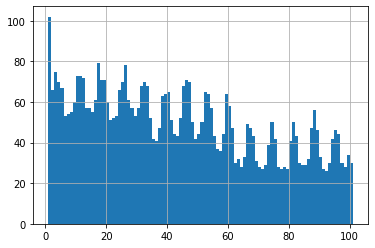

In [131]:
sel_series.hist(bins=[b for b in range(1,num_days+2,1)])

In [132]:
#df2 = df2.join(sel_series)
df2['assigned_day'] = sel_series.astype(int)
#df2['assigned_day'] = df2.assigned_day.astype(int)
df2.head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people,assigned_day,assigned_choice
family_id,,,,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28,4,52,choice_0
1,26,4,82,5,11,47,38,6,66,61,4,26,choice_0
2,100,54,25,12,27,82,10,89,80,33,3,100,choice_0
3,2,95,1,96,32,6,40,31,9,59,2,2,choice_0
4,53,1,47,93,26,3,46,16,42,39,4,53,choice_0


In [133]:
df2[df2.assigned_day.isnull()]

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people,assigned_day,assigned_choice
family_id,,,,,,,,,,,,,


In [134]:
total_people = {}
for d in day:
    mask = df2['assigned_day']==d
    total_people[d] = df2[mask].n_people.sum()
    print(total_people[d])

298
277
299
289
280
247
237
236
265
299
295
295
265
241
242
266
298
299
281
248
215
230
257
292
298
296
268
253
253
254
289
289
256
222
189
174
209
242
276
253
221
187
186
221
256
290
270
235
200
205
236
270
270
235
203
173
166
201
235
225
192
158
129
127
146
179
195
163
132
127
127
130
162
196
162
127
125
125
127
159
188
160
126
132
128
159
188
221
191
156
130
127
126
161
190
161
132
127
126
129


Calculating the actual objective for the problem

In [135]:
def accounting_penalty_actual(Nd,diff):
    return 300/max_people*(Nd-min_people)/400 * Nd**(0.5+np.fabs(diff)/50)

In [136]:
total_accounting_penalty = sum([accounting_penalty_actual(total_people[d],total_people[d]-total_people[d+1])
                                if d<100 
                                else accounting_penalty_actual(total_people[d],0)
                                for d in day])
print(total_accounting_penalty)

7186.289567743348


In [137]:
# Adding a column to the dataframe for the choice made...

def choice_func(r):
    if r['assigned_day'] in r.values[:10]:
        return choice[list(r.values[:10]).index(r.assigned_day)]
    else:
        return 'choice_10'

In [138]:
df2['assigned_choice'] = df2.apply(choice_func,axis=1)
df2[df2.assigned_choice=='choice_4'].head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people,assigned_day,assigned_choice
family_id,,,,,,,,,,,,,
3676,1,87,80,3,93,21,12,53,45,82,6,93,choice_4
4870,4,11,40,34,70,42,17,88,33,27,7,70,choice_4


In [139]:
def simple_cost(r):
    return choice_gc[r['assigned_choice']] + r['n_people']*choice_pm[r['assigned_choice']]

In [140]:
total_simple_cost = df2.apply(simple_cost,axis=1).sum()
total_simple_cost

91190

In [141]:
final_score = total_simple_cost + total_accounting_penalty
print('Final Score: {}'.format(final_score))

Final Score: 98376.28956774334


In [142]:
df2['assigned_day'].to_csv('submission_80180.csv',header=True)

with a limit on the diff of 30 and solving for 500 seconds, the final score was 83115.97

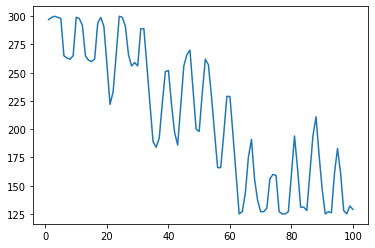

In [108]:
plt.plot(list(total_people.keys()),list(total_people.values()))

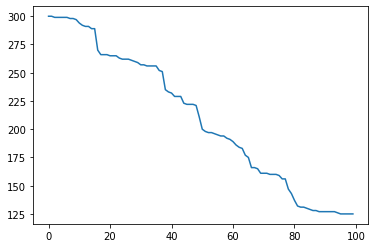

In [109]:
# Creating penalties related to the days that have the highest consumption with no accounting

# sort the days by the number of visitors
sorted_days = {k: v for k, v in sorted(total_people.items(), key=lambda item: item[1],reverse=True)}

plt.plot([i for i in range(100)],list(sorted_days.values()))

In [399]:
# Write the penalties to file
with open('day_penalty.txt','w') as fout:
    fout.write('day\tpenalty\n')
    for k,v in sorted_days.items():
        fout.write('{}\t{}\n'.format(k,v/125))
        print('{}\t{}'.format(k,v/125))
        
        
    

1	2.4
5	2.4
17	2.4
18	2.4
46	2.4
59	2.4
75	2.4
81	2.4
88	2.4
3	2.392
11	2.392
19	2.392
4	2.384
33	2.384
39	2.384
40	2.384
47	2.384
12	2.376
31	2.376
32	2.376
60	2.376
96	2.376
24	2.368
25	2.368
45	2.368
53	2.368
66	2.368
54	2.36
67	2.36
73	2.36
87	2.36
26	2.352
52	2.352
10	2.344
38	2.344
89	2.344
68	2.328
94	2.272
95	2.264
61	2.248
82	2.12
80	2.04
27	1.896
74	1.88
29	1.776
14	1.752
16	1.744
2	1.608
15	1.52
23	1.472
7	1.456
9	1.392
8	1.384
58	1.384
13	1.352
28	1.32
22	1.312
48	1.296
49	1.288
20	1.264
51	1.24
21	1.232
43	1.184
41	1.152
44	1.128
35	1.12
36	1.12
6	1.104
30	1.104
37	1.08
42	1.08
84	1.056
34	1.04
83	1.04
56	1.032
57	1.032
76	1.032
64	1.024
85	1.024
86	1.024
91	1.024
62	1.016
65	1.016
70	1.016
72	1.016
78	1.016
93	1.016
97	1.016
50	1.008
63	1.008
69	1.008
71	1.008
77	1.008
79	1.008
90	1.008
92	1.008
99	1.008
100	1.008
55	1.0
98	1.0
